In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/layoffs.csv")
data

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,LinkedIn,SF Bay Area,Recruiting,660.0,0.03,2023-10-16,Acquired,United States,154.0
1,Bandcamp,SF Bay Area,Other,58.0,0.50,2023-10-16,Acquired,United States,NaN
2,Stack Overflow,New York City,Recruiting,NaN,0.28,2023-10-16,Acquired,United States,153.0
3,PokerStars,Leeds,Consumer,NaN,NaN,2023-10-15,Acquired,United Kingdom,NaN
4,Adda247,Gurugram,Education,300.0,NaN,2023-10-14,Series B,India,61.0
...,...,...,...,...,...,...,...,...,...
3096,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
3097,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
3098,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
3099,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0


In [ ]:
data.shape

(3101, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3101 entries, 0 to 3100
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3101 non-null   object 
 1   location             3100 non-null   object 
 2   industry             3100 non-null   object 
 3   total_laid_off       2071 non-null   float64
 4   percentage_laid_off  2014 non-null   float64
 5   date                 3101 non-null   object 
 6   stage                3094 non-null   object 
 7   country              3101 non-null   object 
 8   funds_raised         2779 non-null   float64
dtypes: float64(3), object(6)
memory usage: 218.2+ KB


In [ ]:
data.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1030
percentage_laid_off    1087
date                      0
stage                     7
country                   0
funds_raised            322
dtype: int64

In [ ]:
data.dropna(subset=["total_laid_off", "percentage_laid_off"], inplace=True)
data

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,LinkedIn,SF Bay Area,Recruiting,660.0,0.03,2023-10-16,Acquired,United States,154.0
1,Bandcamp,SF Bay Area,Other,58.0,0.50,2023-10-16,Acquired,United States,NaN
6,Qualcomm,San Diego,Hardware,1258.0,0.12,2023-10-12,Post-IPO,United States,NaN
7,Lending Club,SF Bay Area,Finance,172.0,0.14,2023-10-12,Post-IPO,United States,392.0
8,MariaDB,SF Bay Area,Data,84.0,0.28,2023-10-12,Post-IPO,United States,272.0
...,...,...,...,...,...,...,...,...,...
3094,Inspirato,Denver,Travel,130.0,0.22,2020-03-16,Series C,United States,79.0
3095,Help.com,Austin,Support,16.0,1.00,2020-03-16,Seed,United States,6.0
3097,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
3098,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0


In [ ]:
data.isnull().sum()

company                  0
location                 0
industry                 1
total_laid_off           0
percentage_laid_off      0
date                     0
stage                    3
country                  0
funds_raised           138
dtype: int64

In [ ]:
data.company.nunique()

1233

In [ ]:
data.location.nunique()

143

In [ ]:
data.location.unique()

array(['SF Bay Area', 'San Diego', 'Los Angeles', 'Seattle',
       'Salt Lake City', 'Montreal', 'New York City', 'Raleigh',
       'Bengaluru', 'Saskatoon', 'Denver', 'Berlin', 'Boston',
       'Belo Horizonte', 'Portland', 'Mumbai', 'London', 'Chicago',
       'Tallinn', 'Nairobi', 'Kolkata', 'Gurugram', 'Santa Barbara',
       'Tel Aviv', 'Atlanta', 'Sandnes', 'Edinburgh', 'Toronto',
       'Sao Paulo', 'Auckland', 'Stockholm', 'Phoenix', 'Tampa Bay',
       'Dublin', 'Miami', 'Chennai', 'Lagos', 'St. Louis', 'Sydney',
       "Ra'anana", 'Singapore', 'Seoul', 'Washington D.C.', 'Melbourne',
       'Baltimore', 'Vancouver', 'Charlottesville', 'Kfar Saba',
       'Kansas City', 'Las Vegas', 'Santiago', 'Ottawa', 'Dallas',
       'Austin', 'Brisbane', 'Riyadh', 'Wrocław', 'Paris', 'Cincinnati',
       'Cleveland', 'Madrid', 'Charlotte', 'Philadelphia', 'Nashua',
       'Chester', 'Calgary', 'Linz', 'Madison', 'Kitchener',
       'Minneapolis', 'Wellington', 'Pune', 'Ann Arbor', 'Boise

In [ ]:
data.stage.nunique()

16

In [ ]:
data.stage.unique()

array(['Acquired', 'Post-IPO', 'Series B', 'Private Equity', 'Series C',
       'Unknown', 'Series F', 'Series D', 'Series E', 'Subsidiary',
       'Series H', 'Seed', 'Series A', 'Series G', nan, 'Series I',
       'Series J'], dtype=object)

In [ ]:
data.country.nunique()

42

In [ ]:
data.country.unique()

array(['United States', 'Canada', 'India', 'Germany', 'Brazil',
       'United Kingdom', 'Estonia', 'Kenya', 'Israel', 'Norway',
       'New Zealand', 'Sweden', 'Ireland', 'Nigeria', 'Australia',
       'Singapore', 'South Korea', 'Chile', 'Saudi Arabia', 'Poland',
       'France', 'Spain', 'Austria', 'Indonesia', 'Netherlands', 'China',
       'Argentina', 'Luxembourg', 'Denmark', 'Thailand', 'Senegal',
       'Hong Kong', 'United Arab Emirates', 'Finland', 'Malaysia',
       'Mexico', 'Russia', 'Seychelles', 'Bulgaria', 'Switzerland',
       'Portugal', 'Myanmar'], dtype=object)

In [ ]:
df = data.set_index('date')
df_2023 = df.loc[:'2023']
df_2022 = df.loc[(df.index > '2022-01-01')&(df.index < '2023-01-01')]
df_2021 = df.loc[(df.index > '2021-01-01')&(df.index < '2022-01-01')]
df_2020 = df.loc[(df.index > '2020-01-01')&(df.index < '2021-01-01')]

In [ ]:
df_combined = pd.concat([df_2020, df_2021, df_2022, df_2023])
df_combined.index = pd.to_datetime(df_combined.index)
df_combined['Year'] = df_combined.index.year
df_agg = df_combined.groupby('Year')['total_laid_off'].sum().reset_index()
fig = px.line(df_agg, x='Year', y='total_laid_off', markers=True, title='Trends of Layoffs Over Four Years')
fig.update_traces(line=dict(width=2))
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Layoffs',
    xaxis=dict(dtick=1),
    showlegend=False,
    template="plotly",
)
fig.show()

In [ ]:
df_2023_most_layoffs = df_2023.sort_values(by='total_laid_off', ascending=False).head(10)
df_2022_most_layoffs = df_2022.sort_values(by='total_laid_off', ascending=False).head(10)
df_2021_most_layoffs = df_2021.sort_values(by='total_laid_off', ascending=False).head(10)
df_2020_most_layoffs = df_2020.sort_values(by='total_laid_off', ascending=False).head(10)


In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go

# Create subplots with a 2x2 grid
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['Year 2020', 'Year 2021', 'Year 2022', 'Year 2023'])

# Assuming you have dataframes df_2020_most_layoffs, df_2021_most_layoffs, df_2022_most_layoffs, df_2023_most_layoffs

# Create a bar chart for Year 2020
trace1 = go.Bar(x=df_2020_most_layoffs['company'], y=df_2020_most_layoffs['total_laid_off'], name='2020')
# Add the trace to the first subplot
fig.add_trace(trace1, row=1, col=1)

# Create a bar chart for Year 2021
trace2 = go.Bar(x=df_2021_most_layoffs['company'], y=df_2021_most_layoffs['total_laid_off'], name='2021')
# Add the trace to the second subplot
fig.add_trace(trace2, row=1, col=2)

# Create a bar chart for Year 2022
trace3 = go.Bar(x=df_2022_most_layoffs['company'], y=df_2022_most_layoffs['total_laid_off'], name='2022')
# Add the trace to the third subplot
fig.add_trace(trace3, row=2, col=1)

# Create a bar chart for Year 2023
trace4 = go.Bar(x=df_2023_most_layoffs['company'], y=df_2023_most_layoffs['total_laid_off'], name='2023')
# Add the trace to the fourth subplot
fig.add_trace(trace4, row=2, col=2)

# Update the layout of the subplots
fig.update_layout(
    title_text="Most no of Layoffs by company in 4 Years",
    xaxis=dict(dtick=1),
    showlegend=False,
    template="plotly",
)

# Show the subplots
fig.show()


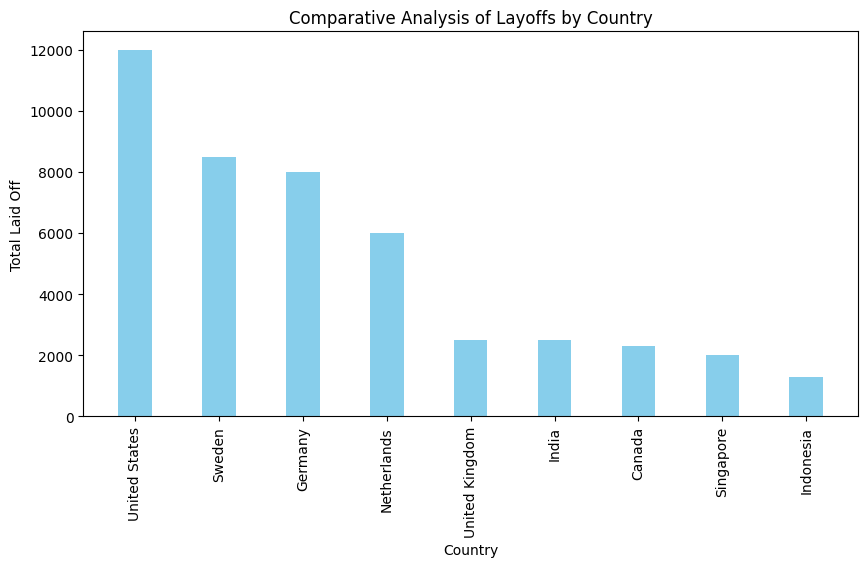

In [ ]:
data_sorted = data.sort_values(by='total_laid_off', ascending=False).head(50)
plt.figure(figsize=(10,5))
plt.bar(data_sorted['country'],data_sorted['total_laid_off'],color='skyblue',width=0.4)
plt.xlabel('Country')
plt.ylabel('Total Laid Off')
plt.title('Comparative Analysis of Layoffs by Country')
plt.xticks(rotation=90)
plt.show()

In [ ]:
us_df = data[data['country'] == 'United States']
top_10 = us_df.groupby('location').sum().sort_values(by='percentage_laid_off',ascending=False).head(5).reset_index()
px.pie(top_10,names='location',values='total_laid_off',
      color_discrete_sequence=px.colors.sequential.Blackbody,
       title='Top 5 Locations in the United States with the Highest Layoffs')

<ipython-input-43-0f0c9eafbc18>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
selected_columns = ['industry','percentage_laid_off']

sf_df = data[data['location'] == 'SF Bay Area'][selected_columns]
sf_top_7 = sf_df.groupby('industry').sum().sort_values(by='percentage_laid_off',ascending=False).head(7).reset_index()

se_df = data[data['location'] == 'Seattle'][selected_columns]
se_top_7 = se_df.groupby('industry').sum().sort_values(by='percentage_laid_off',ascending=False).head(7).reset_index()

ny_df = data[data['location'] == 'New York City'][selected_columns]
ny_top_7 = ny_df.groupby('industry').sum().sort_values(by='percentage_laid_off',ascending=False).head(7).reset_index()


In [ ]:
sf_df

,industry,percentage_laid_off
0,Recruiting,0.03
1,Other,0.50
7,Finance,0.14
8,Data,0.28
9,AI,0.20
...,...,...
3064,Real Estate,0.30
3075,Recruiting,0.17
3076,Finance,0.25
3087,Recruiting,1.00


In [ ]:
import plotly.subplots as sp
import plotly.graph_objs as go

# Create subplots with a 2x2 grid
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=['Sf Bay Area', 'Seattle', 'New York'])

# Create a bar chart for SF Bay Area
trace1 = go.Bar(x=sf_top_7['industry'], y=sf_top_7['percentage_laid_off'], name='SF Bay Area')
fig.add_trace(trace1, row=1, col=1)

# Create a bar chart for Seattle
trace2 = go.Bar(x=se_top_7['industry'], y=se_top_7['percentage_laid_off'], name='Seattle')
fig.add_trace(trace2, row=1, col=2)

# Create a bar chart for New York City
trace3 = go.Bar(x=ny_top_7['industry'], y=ny_top_7['percentage_laid_off'], name='New York City')
fig.add_trace(trace3, row=2, col=1)

# Update x-axis tick rotation and subplot sizes
fig.update_xaxes(tickangle=45)  # Rotate the x-axis tick labels by 45 degrees
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')  # Customize x-axis appearance

fig.update_yaxes(showline=True, linewidth=2, linecolor='black')  # Customize y-axis appearance

# Update the layout of the subplots and adjust subplot sizes
fig.update_layout(
    title_text="Top 7 Industries with the Highest Layoff Percentages in Different Areas",
    showlegend=False,
    template="plotly",
    height=500,  # Set the height of the entire plot
    width=800,   # Set the width of the entire plot
)

# Show the subplots
fig.show()


In [ ]:
sf_df = data[data['location'] == 'SF Bay Area']
top_10 = sf_df.groupby('industry').sum().sort_values(by='percentage_laid_off',ascending=False).head(7).reset_index()


<ipython-input-72-368144f63fd3>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
location_df = data[(data['location'] == 'SF Bay Area')]
industry_df = data[(data['industry'] == 'Finance')]
selected_df = industry_df[['company', 'total_laid_off']]
selected_df.reset_index(drop=True, inplace=True)
top_10 = sf_df.groupby('company').sum().sort_values(by='total_laid_off',ascending=False).head(10).reset_index()

<ipython-input-84-575623027145>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
custom_colors = ['#008080'] * len(top_10)
fig = px.scatter(
    top_10,
    x='company',
    y='total_laid_off',
    color_discrete_sequence=custom_colors,
    title='Top 10 Companies in the Finance Industry with the Highest Layoffs',
    labels={'company': 'Company', 'total_laid_off': 'Total Laid Off'},
)
fig.update_traces(marker=dict(size=12, opacity=0.7))
fig.update_layout(
    xaxis_title_font=dict(size=14, color='black'),
    font=dict(size=12, color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis_tickangle=0,
)
fig.show()

In [ ]:
location_df = data[(data['location'] == 'SF Bay Area')]
industry_df = data[(data['industry'] == 'Finance')]
selected_df = industry_df[['company', 'funds_raised']]
selected_df.reset_index(drop=True, inplace=True)
top_10 = sf_df.groupby('company').sum().sort_values(by='funds_raised',ascending=False).head(5).reset_index()

<ipython-input-86-40959545b6f3>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
custom_colors = ['#A8DADC', '#81E6D9', '#5EAAA8', '#9DCC9E', '#78BE82', '#AAD47D', '#B5E48C', '#DFF4D7', '#E1FAF9', '#CDF0EA']

fig = px.bar(
    top_10,
    x='company',
    y='funds_raised',
    text='funds_raised',
    title='Top 5 Companies in the San Francisco Bay Area with the Highest Funds Raised',
    labels={'company': 'Company', 'funds_raised': 'Funds Raised'},
    color_discrete_sequence=custom_colors,
)

fig.update_traces(marker_line_width=0, opacity=0.7)

fig.update_layout(
    xaxis_title_font=dict(size=14, color='black'),
    yaxis_title_font=dict(size=14, color='black'),
    font=dict(size=12, color='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis_tickangle=0,
    xaxis_ticksuffix="",
    yaxis_ticksuffix=" ",
)

fig.show()